### Exploración tiempos espera

### Carga y Análisis General

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('../../data/eventos_despegues_semana.csv')
df.columns

Index(['ICAO', 'ultimo_parado', 'despegue', 'tiempo_espera', 'fecha_despegue',
       'hora_despegue'],
      dtype='object')

In [78]:
df.shape

(4037, 6)

In [52]:
df.head()

,ICAO,ultimo_parado,despegue,tiempo_espera,fecha_despegue,hora_despegue
0,02A197,2024-12-06 20:48:32.149,2024-12-06 20:48:55.418,23.269,2024-12-06,20
1,347505,2024-12-06 13:49:26.738,2024-12-06 13:49:45.454,18.716,2024-12-06,13
2,4CADF5,2024-12-07 09:11:00.861,2024-12-07 09:17:16.958,376.097,2024-12-07,9
3,4D2257,2024-12-01 18:39:45.284,2024-12-01 19:45:34.792,3949.508,2024-12-01,19
4,34510A,2024-12-02 11:33:23.019,2024-12-02 11:33:52.083,29.064,2024-12-02,11


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ICAO            4037 non-null   object 
 1   ultimo_parado   4037 non-null   object 
 2   despegue        4037 non-null   object 
 3   tiempo_espera   4037 non-null   float64
 4   fecha_despegue  4037 non-null   object 
 5   hora_despegue   4037 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 189.4+ KB


Convertimos las columnas al tipo fecha

In [54]:
df['ultimo_parado'] = pd.to_datetime(df['ultimo_parado'])
df['despegue'] = pd.to_datetime(df['despegue'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ICAO            4037 non-null   object        
 1   ultimo_parado   4037 non-null   datetime64[ns]
 2   despegue        4037 non-null   datetime64[ns]
 3   tiempo_espera   4037 non-null   float64       
 4   fecha_despegue  4037 non-null   object        
 5   hora_despegue   4037 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 189.4+ KB


In [55]:
df['tiempo_espera'].describe()

count      4037.000000
mean       1759.827659
std       20037.165736
min           0.000000
25%          24.311000
50%          36.979000
75%         477.990000
max      518771.655000
Name: tiempo_espera, dtype: float64

**El máximo** es bastante sospechoso, tendremos que ver que ha pasado

**La mediana (50 %)** también parece decir cosas extrañas, que para la mitad de los datos los tiempos de espera no pasan del medio minuto

#### Despegues por horas

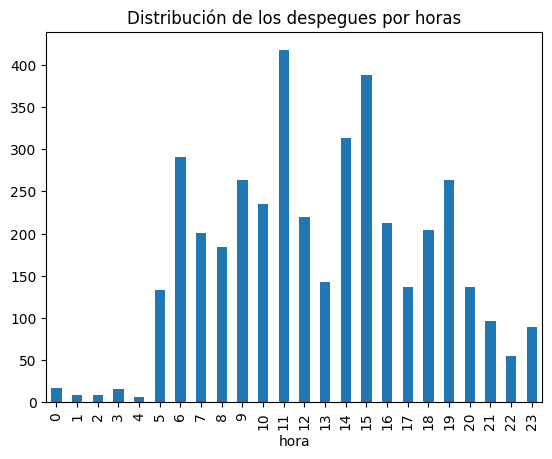

In [56]:
df.hora_despegue.value_counts().sort_index().plot(kind="bar")
plt.title('Distribución de los despegues por horas')
plt.xlabel('hora');

Vemos varias cosas:
- Hay muy pocos datos entre **las 0 y las 4 de la mañana**
- El mayor número de despegues ocurre a las 11 de la mañana

In [57]:
df.despegue.dt.day_of_week.value_counts()

despegue
4    684
0    608
3    580
2    569
1    551
5    532
6    513
Name: count, dtype: int64

#### Despegues por días de la semana

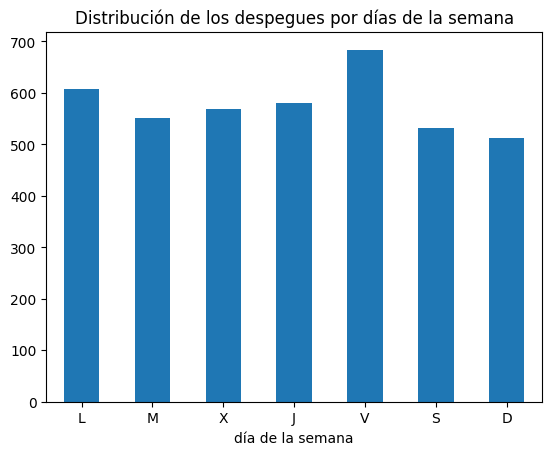

In [58]:
dias_semana = df.despegue.dt.day_of_week.value_counts().sort_index()
dias_semana.index = dias_semana.index.map(lambda x: ['L', 'M', 'X', 'J', 'V', 'S', 'D'][x])
dias_semana.plot(kind="bar")
plt.title('Distribución de los despegues por días de la semana')
plt.xticks(rotation=0)
plt.xlabel('día de la semana');

En este caso las distribución de vuelos parece ser uniforme para los días de las semana, esto es un punto a favor para la consistencias los datos extraídos

**Unstacked bar plot**

### Histograma

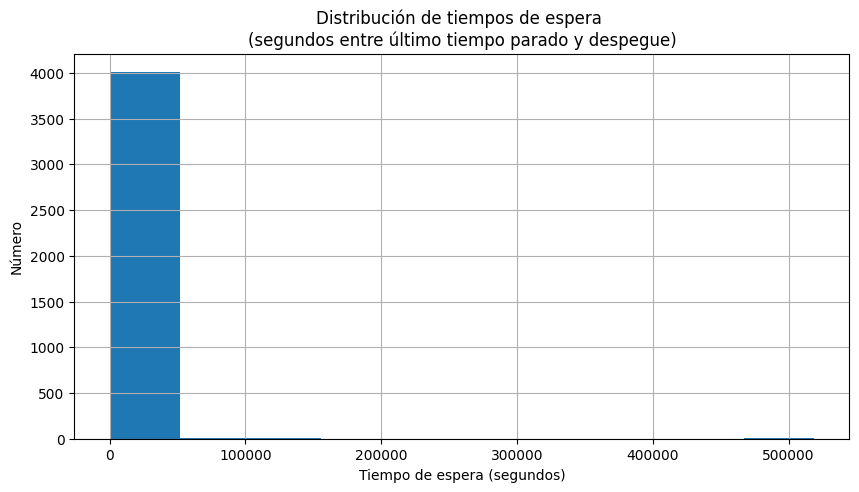

In [59]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df.tiempo_espera.hist(ax=ax);

#### Cogemos solo vuelos que se esperan menos de 30 minutos y más de 1

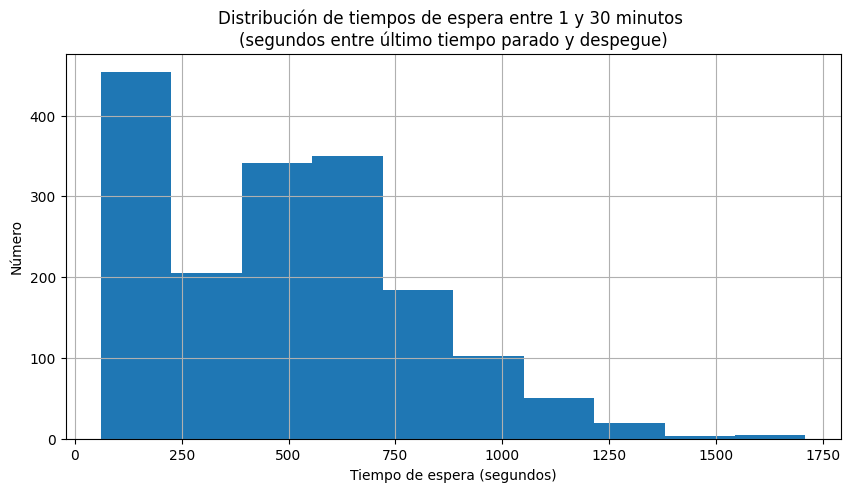

In [60]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera entre 1 y 30 minutos \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')

umbral_low, umbral_high = 1 * 60, 30 * 60
df_entre_5_20 = df[(df.tiempo_espera > umbral_low) & (df.tiempo_espera < umbral_high)]
df_entre_5_20.tiempo_espera.hist(ax=ax);

### Por avión

In [61]:
df['ICAO'].value_counts()

ICAO
345385    99
343650    29
345597    27
344195    25
34604C    25
          ..
4D24EA     1
AA944A     1
4B15EE     1
4CA244     1
AA44CF     1
Name: count, Length: 1147, dtype: int64

**Bastante raro** que el avión `345385` haya hecho 99 despegues, vamos a verlo

In [62]:
df_345385 = df[df['ICAO'] == "345385"]
df_345385.head(10)

,ICAO,ultimo_parado,despegue,tiempo_espera,fecha_despegue,hora_despegue
1182,345385,2024-12-06 07:17:56.355,2024-12-06 07:23:22.623,326.268,2024-12-06,7
1183,345385,2024-12-06 10:58:06.479,2024-12-06 10:58:07.202,0.723,2024-12-06,10
1184,345385,2024-12-06 10:58:11.673,2024-12-06 10:58:12.163,0.490,2024-12-06,10
1185,345385,2024-12-06 10:58:13.325,2024-12-06 10:58:13.809,0.484,2024-12-06,10
1186,345385,2024-12-06 10:58:13.809,2024-12-06 10:58:13.843,0.034,2024-12-06,10
1187,345385,2024-12-06 10:58:16.475,2024-12-06 10:58:16.820,0.345,2024-12-06,10
1188,345385,2024-12-06 10:58:39.521,2024-12-06 10:58:39.622,0.101,2024-12-06,10
1189,345385,2024-12-06 10:59:05.242,2024-12-06 10:59:05.692,0.450,2024-12-06,10
1190,345385,2024-12-06 10:59:12.379,2024-12-06 10:59:12.896,0.517,2024-12-06,10
1191,345385,2024-12-06 10:59:16.162,2024-12-06 10:59:16.782,0.620,2024-12-06,10


Parece ser que hay algunos despegues que **tardan 0 segundos**, no tiene sentido ver esos datos.

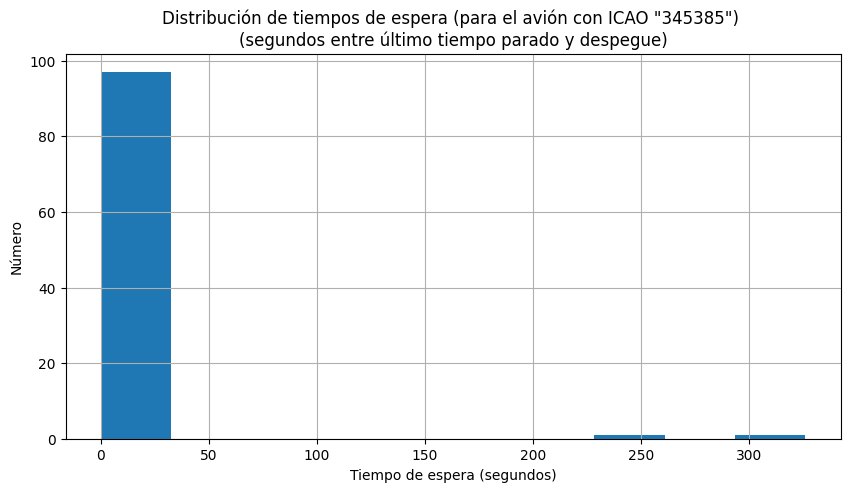

In [63]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera (para el avión con ICAO "345385") \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df_345385.tiempo_espera.hist(ax=ax);

Más del 80 de los despegues son en menos de 1 minuto, hay que ver que ocurre para tiempos menores de 50 segundos solo (hacemos un zoom en el histograma anterior)

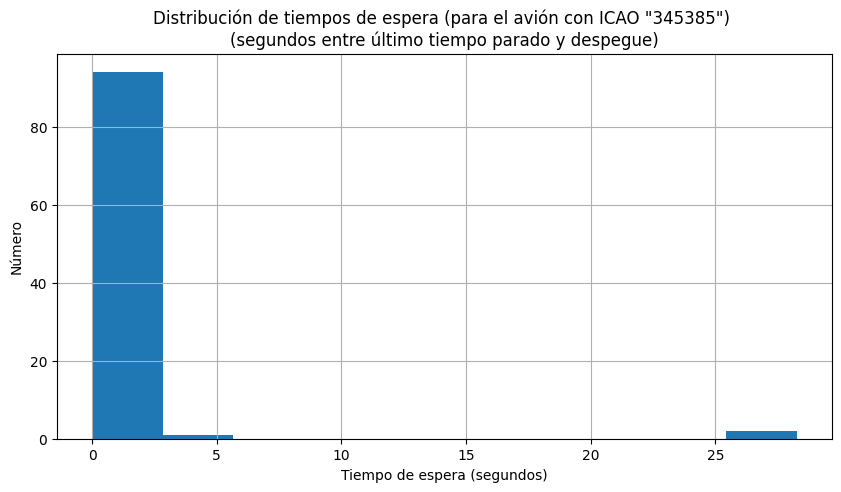

In [64]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera (para el avión con ICAO "345385") \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df_345385[df_345385.tiempo_espera < 50].tiempo_espera.hist(ax=ax);

Más del 80 de los despegues son en menos de 5 segundos, seguro que se trata de un error.

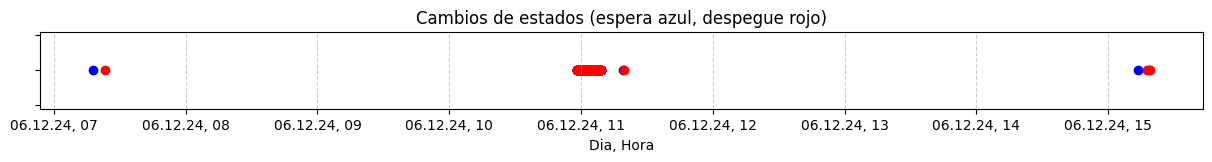

In [65]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(1,1, figsize=(15, 1))

axs.scatter(df_345385.ultimo_parado, [1] * df_345385.shape[0], marker="o", color="blue")
axs.scatter(df_345385.despegue, [1] * df_345385.shape[0], marker="o", color="red")

axs.set_title("Cambios de estados (espera azul, despegue rojo)")
axs.grid(axis='x', linestyle='--', alpha=0.6)

axs.set_yticklabels([])
axs.set_xlabel("Dia, Hora")
myFmt = mdates.DateFormatter('%d.%m.%y, %H')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
axs.xaxis.set_major_formatter(myFmt);

Todos los datos son para **del 6 de DICIEMBRE**

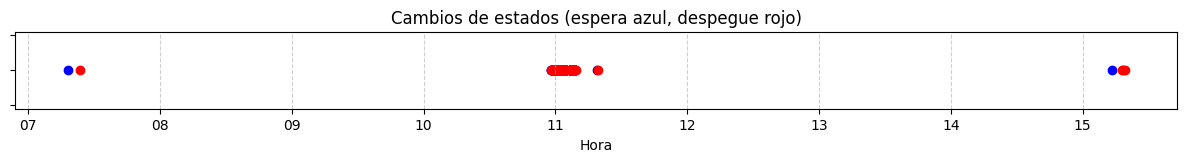

In [66]:
fig, axs = plt.subplots(1,1, figsize=(15, 1))

axs.scatter(df_345385.ultimo_parado, [1] * df_345385.shape[0], marker="o", color="blue")
axs.scatter(df_345385.despegue, [1] * df_345385.shape[0], marker="o", color="red")

axs.set_title("Cambios de estados (espera azul, despegue rojo)")
axs.grid(axis='x', linestyle='--', alpha=0.6)

axs.set_yticklabels([])
axs.set_xlabel("Hora")
myFmt = mdates.DateFormatter('%H')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
axs.xaxis.set_major_formatter(myFmt);

In [77]:
df[df.tiempo_espera < 1]

,ICAO,ultimo_parado,despegue,tiempo_espera,fecha_despegue,hora_despegue
337,345692,2024-12-06 09:27:26.415,2024-12-06 09:27:26.819,0.404,2024-12-06,9
1183,345385,2024-12-06 10:58:06.479,2024-12-06 10:58:07.202,0.723,2024-12-06,10
1184,345385,2024-12-06 10:58:11.673,2024-12-06 10:58:12.163,0.490,2024-12-06,10
1185,345385,2024-12-06 10:58:13.325,2024-12-06 10:58:13.809,0.484,2024-12-06,10
1186,345385,2024-12-06 10:58:13.809,2024-12-06 10:58:13.843,0.034,2024-12-06,10
...,...,...,...,...,...,...
1628,343650,2024-12-04 18:52:59.726,2024-12-04 18:53:00.402,0.676,2024-12-04,18
2109,3452C7,2024-12-04 07:53:16.211,2024-12-04 07:53:17.052,0.841,2024-12-04,7
2897,345615,2024-12-04 21:57:27.410,2024-12-04 21:57:28.021,0.611,2024-12-04,21
3386,345292,2024-12-04 11:36:17.268,2024-12-04 11:36:17.884,0.616,2024-12-04,11


### Boxplot

Cogemos los 10 aviones con mas filas sobre tiempos de espera

In [108]:
top_10_most_frequent = df.ICAO.value_counts()[:10]
top_10_most_frequent

ICAO
345385    99
343650    29
345597    27
344195    25
34604C    25
34750A    24
34750F    24
345698    23
347307    23
3453CC    22
Name: count, dtype: int64

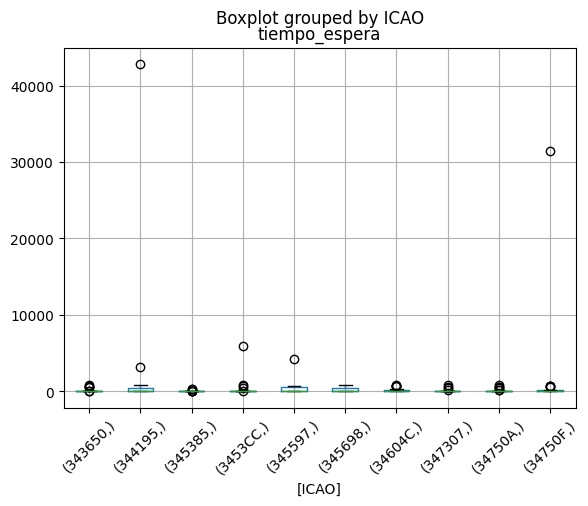

In [109]:
df[df.ICAO.isin(top_10_most_frequent.index)].boxplot(column=['tiempo_espera'], by=['ICAO'])
plt.xticks(rotation=45);

No es casi nada informativo por los outliers, vamos a realizar una selección de los datos, como hacíamos en los histogramas

**Decartamos filas con tiempo inferior a 1 minuto y superiores a 30 minutos**

Cogemos los 10 aviones con mas filas sobre tiempos de espera

In [110]:
df_from_1_min = df[(df.tiempo_espera > 60) & (df.tiempo_espera < 1800)]
top_10_most_frequent = df_from_1_min.ICAO.value_counts()[:10]
top_10_most_frequent

ICAO
34604B    13
344446    12
34604C    12
345597    12
345583    12
34660B    12
345698    12
34134E    12
344417    12
344217    11
Name: count, dtype: int64

En este caso lo bueno es que tienen un número similar de filas

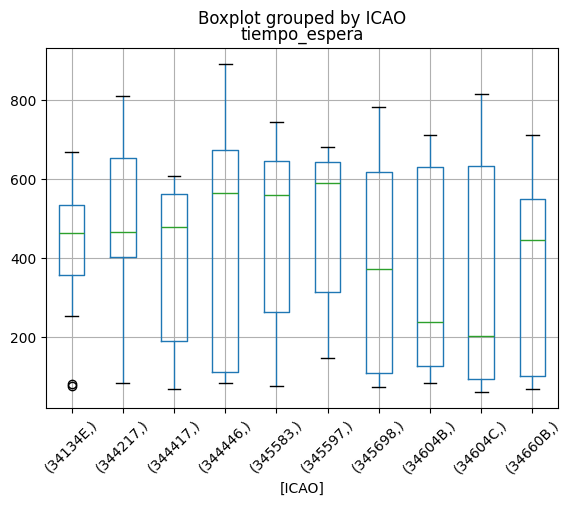

In [113]:
df_from_1_min[df_from_1_min.ICAO.isin(top_10_most_frequent.index)].boxplot(column=['tiempo_espera'], by=['ICAO'])
plt.xticks(rotation=45);

En este caso se pueden sacar algunos resultados.

Las medianas de los tiempos son muy diferentes, en un caso siendo 3 minutos (200 segundos) y en otros alrededor de 7 minutos (450 segundos)

In [67]:
import seaborn as sns

In [68]:
df['tiempo_espera'].describe()

count      4037.000000
mean       1759.827659
std       20037.165736
min           0.000000
25%          24.311000
50%          36.979000
75%         477.990000
max      518771.655000
Name: tiempo_espera, dtype: float64

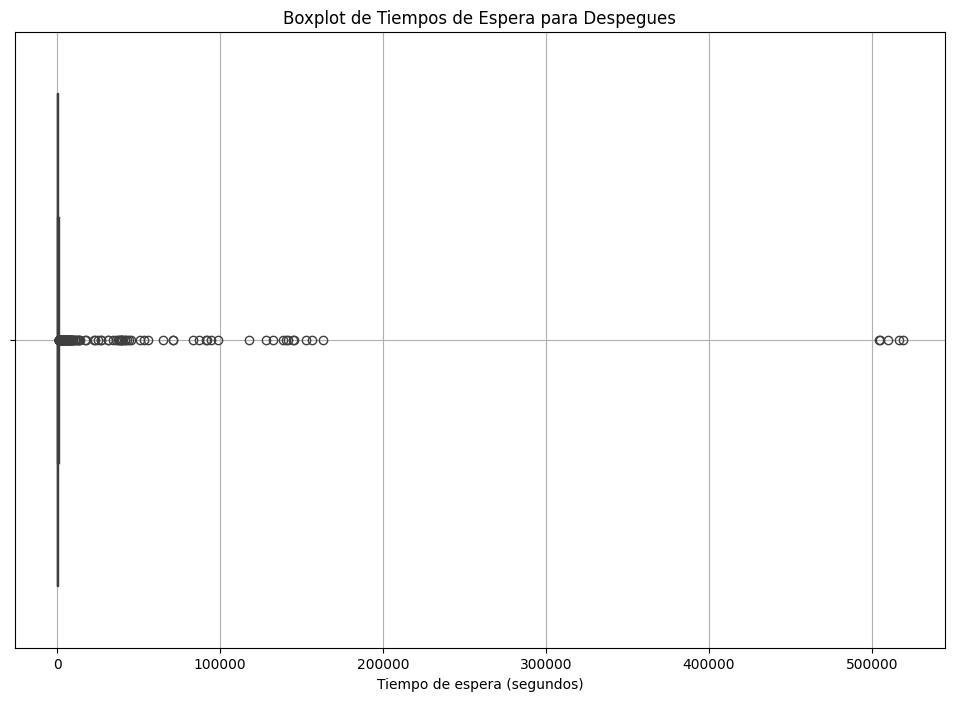

In [69]:
plt.figure(figsize=(12, 8))  # Tamaño de la figura
sns.boxplot(x=df['tiempo_espera'])
plt.title('Boxplot de Tiempos de Espera para Despegues')  # Título del gráfico
plt.xlabel('Tiempo de espera (segundos)')  # Etiqueta del eje X
plt.grid(True)  # Añadir una cuadrícula para mejor visualización
plt.show()